# Exploratory Data Analysis

##Goal
*   To detect relationship between features
*   To visualize the data




In [0]:
from google.colab import  drive

drive.mount('/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import pandas as pd

data = '/drive/My Drive/Transportation Project Team/data processing/merged_data.csv'

df = pd.read_csv(data)


In [0]:
main_df = df.copy()

### Map EVs density per county

In [0]:
# dropping rows with nan values because plotly will read nan as float

df.dropna(subset=['EVs on the Road'], inplace=True)


In [0]:
# uncomment all of the following module before running the code below

# %%bash
# pip install plotly-geo
# pip install geopandas==0.3.0
# pip install pyshp==1.2.10
# pip install shapely==1.6.3

In [0]:
# Plotting EVs density on county level with custom binning

import plotly.figure_factory as ff
import numpy as np

# values = df6['EVs on the Road'].tolist()
values1 = df['EVs on the Road'].tolist()
fips = df['County FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]


fig = ff.create_choropleth(
    fips=fips, values=values1, scope=['NY'],
    binning_endpoints=[38.0, 98.0, 152.0, 238, 1034], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='EVs on the Road', title='New York State')

fig.show()

In [0]:
# The following is to map the stations geocode to a google map
# generated file is on the drive folder named 'gmplot.html'

# !pip install gmplot

# lats = df6['Latitude']
# longs = df6['Longitude']

# import gmplot 

# # api key for project purposes only
# gmap = gmplot.GoogleMapPlotter(43.188583, -75.541099, 10, apikey='APIKEY')
# gmap.heatmap(lats,longs)
# gmap.scatter(lats, longs, 'red',size = 200, marker = False)
# gmap.draw('gmplot.html')

# finding the min and max of the geocode
# BBox = (df3['Longitude'].min(),df3['Longitude'].max(),df3['Latitude'].min(),df3['Latitude'].max())

# print(BBox)

In [0]:
from sklearn import preprocessing

df = main_df

to_normalization = df[['Sum of Travel Time to Work (Less than 10 minutes)',
                'Sum of Travel Time to Work (10 to 14 minutes)',
              'Sum of Travel Time to Work (15 to 19 minutes)',
              'Sum of Travel Time to Work (20 to 24 minutes)',
              'Sum of Travel Time to Work (25 to 29 minutes)',
              'Sum of Travel Time to Work (30 to 34 minutes)',
               'Sum of Travel Time to Work (35 to 44 minutes)',
               'Sum of Travel Time to Work (45 to 59 minutes)',
               'Sum of Travel Time to Work (60 or more minutes)',
                'Total Sum of Energy (kWh)', 'Current Population', 'EVs on the Road',
                'Total Sum of Charging Time (hours)', 'DCFC Ports', 'Level 2 Ports']]

normalization_cols = ['Sum of Travel Time to Work (Less than 10 minutes)',
                'Sum of Travel Time to Work (10 to 14 minutes)',
              'Sum of Travel Time to Work (15 to 19 minutes)',
              'Sum of Travel Time to Work (20 to 24 minutes)',
              'Sum of Travel Time to Work (25 to 29 minutes)',
              'Sum of Travel Time to Work (30 to 34 minutes)',
               'Sum of Travel Time to Work (35 to 44 minutes)',
               'Sum of Travel Time to Work (45 to 59 minutes)',
               'Sum of Travel Time to Work (60 or more minutes)',
                'Total Sum of Energy (kWh)','Current Population', 'EVs on the Road',
                'Total Sum of Charging Time (hours)', 'DCFC Ports', 'Level 2 Ports']

minmax_scale = preprocessing.MinMaxScaler().fit(to_normalization)
df_minmax = minmax_scale.transform(to_normalization)

df.drop(normalization_cols,axis=1, inplace=True)

df_minmax = pd.DataFrame(df_minmax,columns=[normalization_cols])

df[normalization_cols] = df_minmax


### Scatter plots

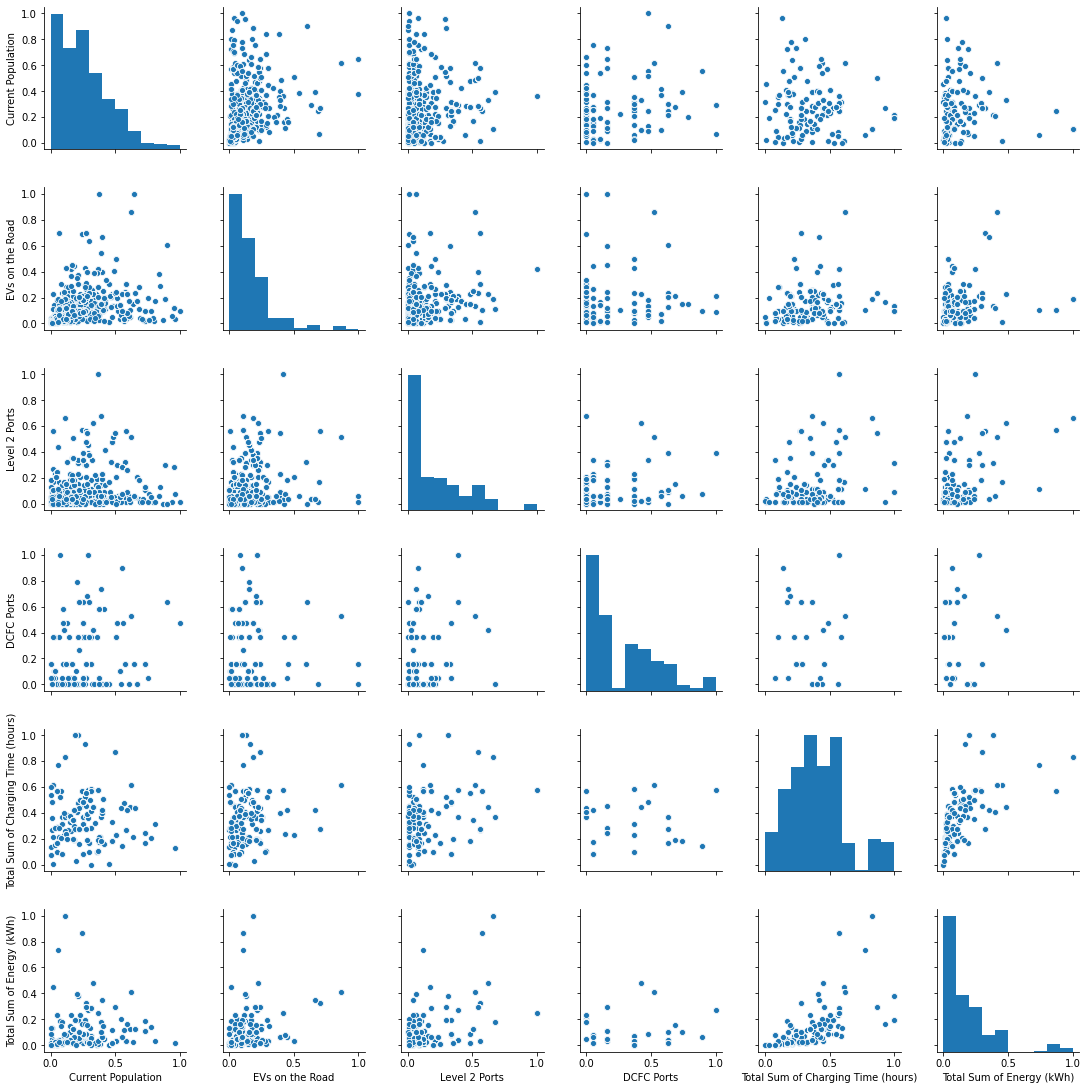

In [0]:
import seaborn as sns


pairplot_features = df.filter(items=['Current Population', 'EVs on the Road', 'Level 2 Ports', 'DCFC Ports',                                      
                                        'Total Sum of Charging Time (hours)','Total Sum of Energy (kWh)'])

g = sns.pairplot(pairplot_features)


[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'Zipcode'),
 Text(2.5, 0, 'Current Population'),
 Text(3.5, 0, 'EVs on the Road'),
 Text(4.5, 0, 'BEVs per 1k People'),
 Text(5.5, 0, 'PHEVs per 1k People'),
 Text(6.5, 0, 'DCFC Ports'),
 Text(7.5, 0, 'Level 2 Ports'),
 Text(8.5, 0, 'DCFC per 1k People'),
 Text(9.5, 0, 'Level 2 per 1k People'),
 Text(10.5, 0, 'Sum of Travel Time to Work (Less than 10 minutes)'),
 Text(11.5, 0, 'Sum of Travel Time to Work (10 to 14 minutes)'),
 Text(12.5, 0, 'Sum of Travel Time to Work (15 to 19 minutes)'),
 Text(13.5, 0, 'Sum of Travel Time to Work (20 to 24 minutes)'),
 Text(14.5, 0, 'Sum of Travel Time to Work (25 to 29 minutes)'),
 Text(15.5, 0, 'Sum of Travel Time to Work (30 to 34 minutes)'),
 Text(16.5, 0, 'Sum of Travel Time to Work (35 to 44 minutes)'),
 Text(17.5, 0, 'Sum of Travel Time to Work (45 to 59 minutes)'),
 Text(18.5, 0, 'Sum of Travel Time to Work (60 or more minutes)'),
 Text(19.5, 0, 'Sum of Median Household Income in Past 12 Months'),
 T

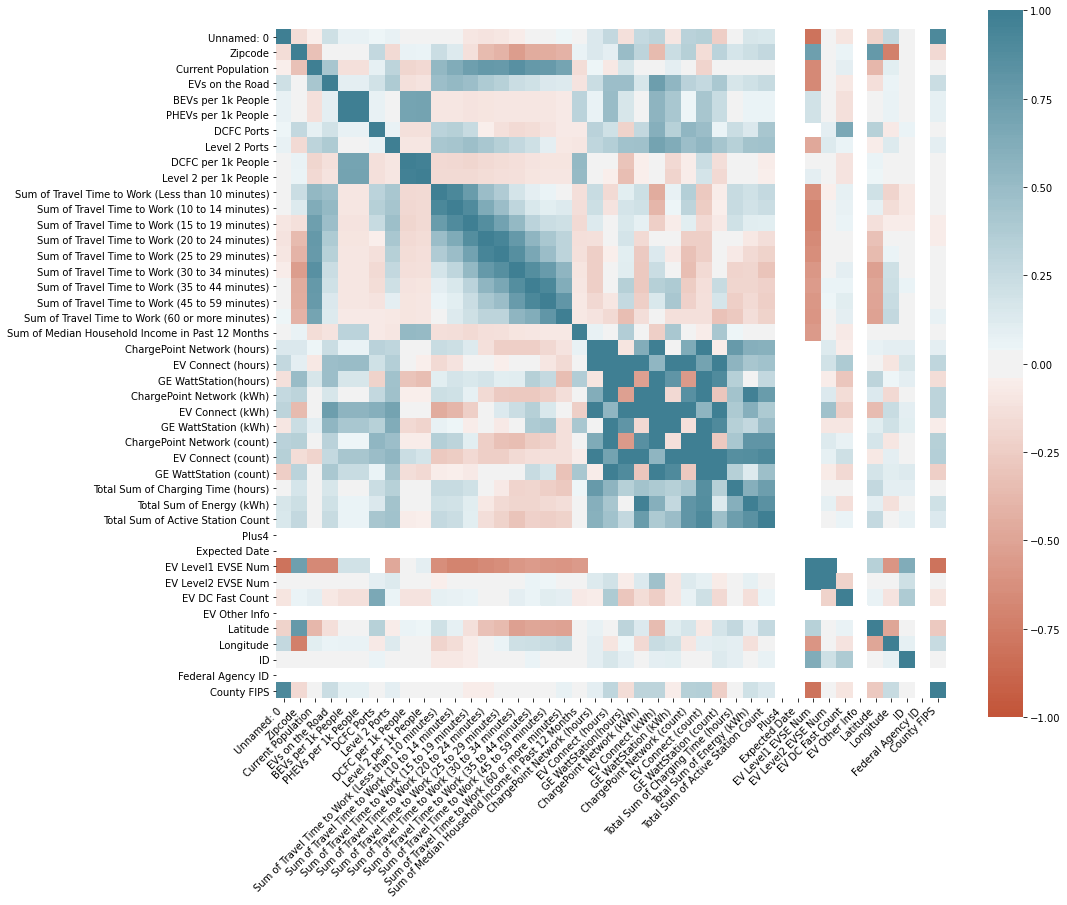

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()

f, ax = plt.subplots(figsize=(15, 13))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



In [0]:
# fill missing values with mean for numeric and mode for categorical

# df['Current Population']=df['Current Population'].fillna(df['Current Population'].mean())
# df['BEVs per 1k People']=df['BEVs per 1k People'].fillna(df['BEVs per 1k People'].mean())
# df['PHEVs per 1k People']=df['PHEVs per 1k People'].fillna(df['PHEVs per 1k People'].mean())
# # df['DCFC Ports']=df['DCFC Ports'].fillna(df['DCFC Ports'].mean())
# df['Level 2 Ports']=df['Level 2 Ports'].fillna(df['Level 2 Ports'].mean())
# df['DCFC per 1k People']=df['DCFC per 1k People'].fillna(df['DCFC per 1k People'].mean())
# df['Level 2 per 1k People']=df['Level 2 per 1k People'].fillna(df['Level 2 per 1k People'].mean())
# df['Sum of Travel Time to Work (Less than 10 minutes)']=df['Sum of Travel Time to Work (Less than 10 minutes)'].fillna(df['Sum of Travel Time to Work (Less than 10 minutes)'].mean())
# df['Sum of Travel Time to Work (10 to 14 minutes)']=df['Sum of Travel Time to Work (10 to 14 minutes)'].fillna(df['Sum of Travel Time to Work (10 to 14 minutes)'].mean())
# df['Sum of Travel Time to Work (15 to 19 minutes)']=df['Sum of Travel Time to Work (15 to 19 minutes)'].fillna(df['Sum of Travel Time to Work (15 to 19 minutes)'].mean())
# df['Sum of Travel Time to Work (20 to 24 minutes)']=df['Sum of Travel Time to Work (20 to 24 minutes)'].fillna(df['Sum of Travel Time to Work (20 to 24 minutes)'].mean())
# df['Sum of Travel Time to Work (25 to 29 minutes)']=df['Sum of Travel Time to Work (25 to 29 minutes)'].fillna(df['Sum of Travel Time to Work (25 to 29 minutes)'].mean())
# df['Sum of Travel Time to Work (30 to 34 minutes)']=df['Sum of Travel Time to Work (30 to 34 minutes)'].fillna(df['Sum of Travel Time to Work (30 to 34 minutes)'].mean())
# df['Sum of Travel Time to Work (35 to 44 minutes)']=df['Sum of Travel Time to Work (35 to 44 minutes)'].fillna(df['Sum of Travel Time to Work (35 to 44 minutes)'].mean())
# df['Sum of Travel Time to Work (45 to 59 minutes)']=df['Sum of Travel Time to Work (45 to 59 minutes)'].fillna(df['Sum of Travel Time to Work (45 to 59 minutes)'].mean())
# df['Sum of Travel Time to Work (60 or more minutes)']=df['Sum of Travel Time to Work (60 or more minutes)'].fillna(df['Sum of Travel Time to Work (60 or more minutes)'].mean())
# df['Sum of Median Household Income in Past 12 Months']=df['Sum of Median Household Income in Past 12 Months'].fillna(df['Sum of Median Household Income in Past 12 Months'].mean())
# df['Total Sum of Charging Time (hours)']=df['Total Sum of Charging Time (hours)'].fillna(df['Total Sum of Charging Time (hours)'].mean())
# df['Total Sum of Energy (kWh)']=df['Total Sum of Energy (kWh)'].fillna(df['Total Sum of Energy (kWh)'].mean())
# # df['Total Sum of Active Station Count']=df['Total Sum of Active Station Count'].fillna(df['Total Sum of Active Station Count'].mean())
# df['ev_pricing']=df['ev_pricing'].fillna(df['ev_pricing'].mode()[0])






In [0]:
df['ev_pricing'].value_counts()

Free                                                                                                                               715
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW                                                  42
Level 2: $0.59 per kWh                                                                                                              36
$0.49 per kWh, minimum payment of $1                                                                                                11
$0.49 per kWh, first 5 minutes free, minimum payment of $0.50                                                                       10
                                                                                                                                  ... 
Pricing is based on length of time. $2 per hour for the first 4 hours, and $5 per additional hour, minimum payment of $2             1
$2 per kWh, minimum payment of $1                      

In [0]:
#!pip install --upgrade pandas-profiling

# generating an explanatory analaysis of the combined data

# already generated (located in google drive)


# import pandas_profiling

# eda_report = pandas_profiling.ProfileReport(df6)
# eda_report.to_file("EVs_eda.html")

# pandas_profiling.ProfileReport(df6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


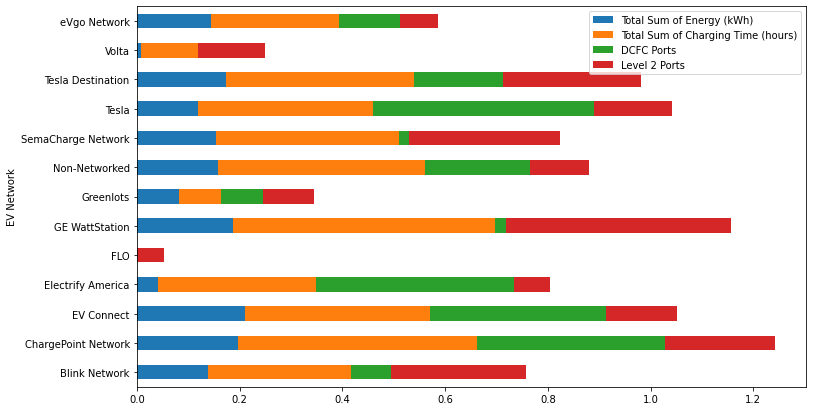

In [0]:
ev_network = df.groupby('EV Network')
ev_network['Total Sum of Energy (kWh)','Total Sum of Charging Time (hours)',
           'DCFC Ports','Level 2 Ports'].mean().plot.barh(stacked=True, figsize=(12,7))